In [34]:
from google.colab import auth
auth.authenticate_user()

# crowd source data from https://www.google.com/search?q=rgb+color+picker&oq=rgb+color+pick&aqs=chrome.0.0i131i433i512j69i57j0i512l8.3860j0j7&sourceid=chrome&ie=UTF-8 
# Spreadsheet: https://docs.google.com/spreadsheets/d/1YxKU56T1j848K0kHcgQfqUuYxjE7G9F2_j87sswKmbE/edit#gid=0

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('GuessPurple').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
df.columns = df.iloc[0,:]
df = df.iloc[1:, :]
print(df.head())

import numpy as np
df[df==''] = np.nan
df = df.dropna()

df[df=="No "] = "No" 


0    R    G    B PurpleOrNot  Gender
1  255    0  255          No    Male
2  183   52  235         Yes    Male
3  165   14  235         Yes    Male
4   14  202  235          No    Male
5  213  204  219         Yes  Female


In [35]:
df['R'] = df['R'].astype('float64')
df['G'] = df['G'].astype('float64')
df['B'] = df['B'].astype('float64')

df['PurpleOrNot'] = df['PurpleOrNot'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 1 to 227
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   R            227 non-null    float64 
 1   G            227 non-null    float64 
 2   B            227 non-null    float64 
 3   PurpleOrNot  227 non-null    category
 4   Gender       227 non-null    category
dtypes: category(2), float64(3)
memory usage: 7.8 KB


In [36]:
df.describe()

,R,G,B
count,227.000000,227.000000,227.000000
mean,125.409692,105.792952,146.118943
std,75.531594,88.099081,77.749478
min,0.000000,0.000000,0.000000
25%,64.500000,26.000000,82.500000
50%,125.000000,85.000000,156.000000
75%,183.000000,193.000000,216.000000
max,255.000000,342.000000,255.000000


In [37]:
df.PurpleOrNot.value_counts()

No     137
Yes     90
Name: PurpleOrNot, dtype: int64

In [ ]:
! pip install sweetviz

In [ ]:
! pip install autoviz

In [ ]:
! pip install sdv

# Use low-code / no-code libs for EDA

In [38]:
import sweetviz
import pandas as pd
my_report  = sweetviz.analyze(df) 

                                             |          | [  0%]   00:00 -> (? left)


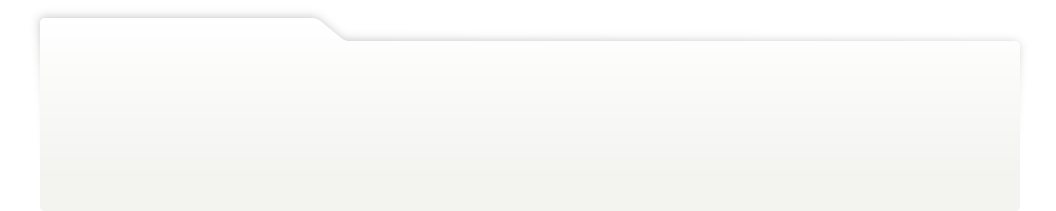
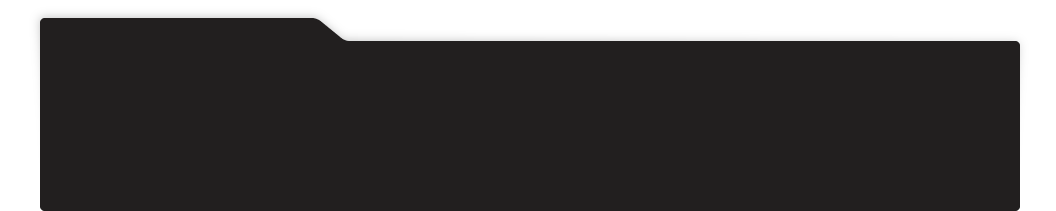
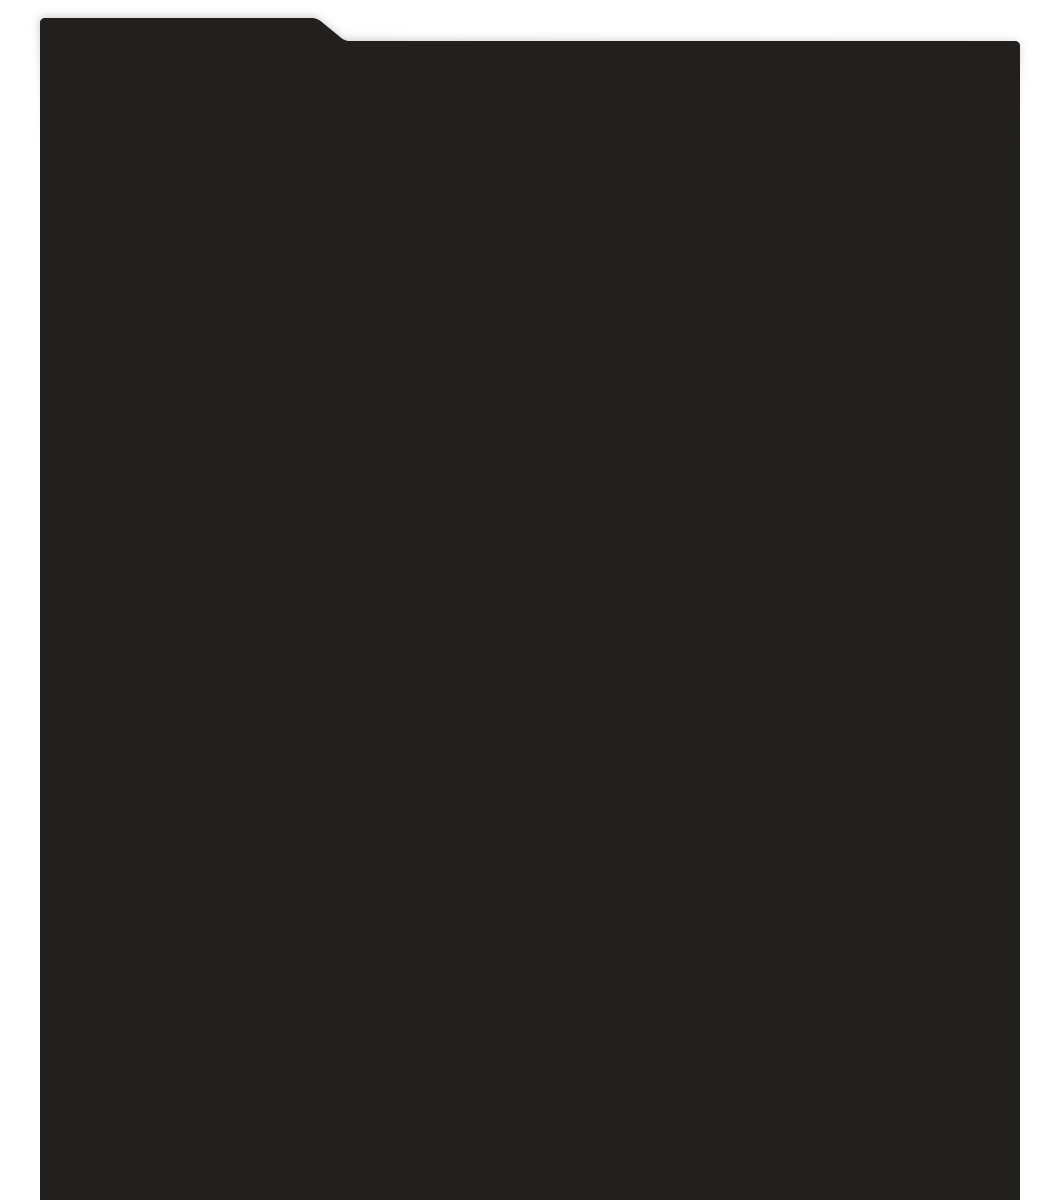
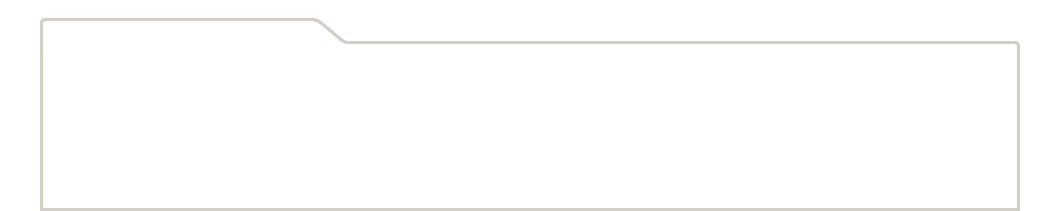
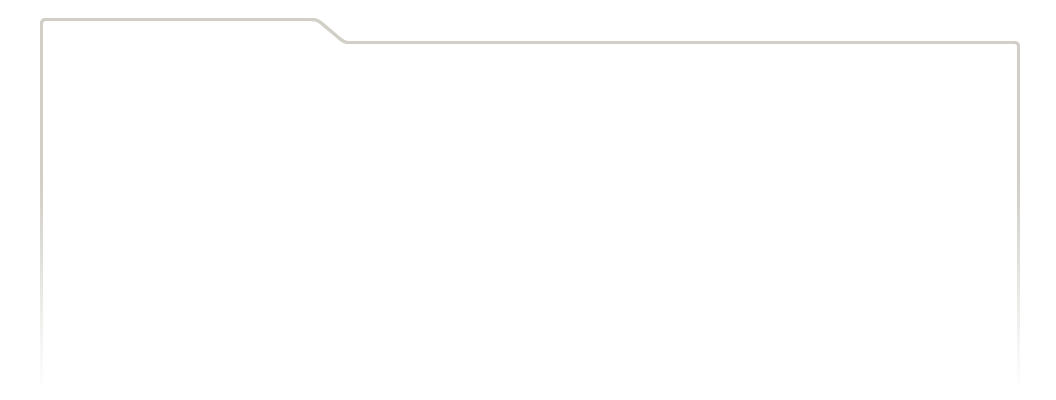
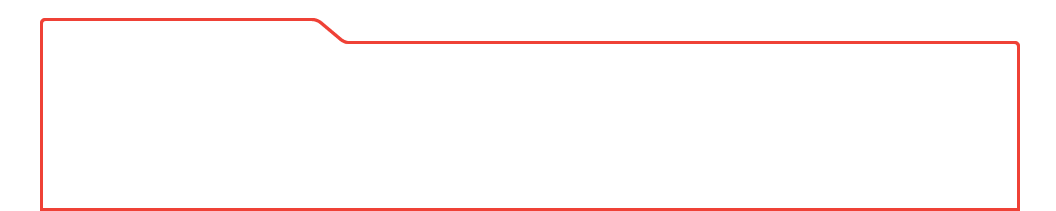
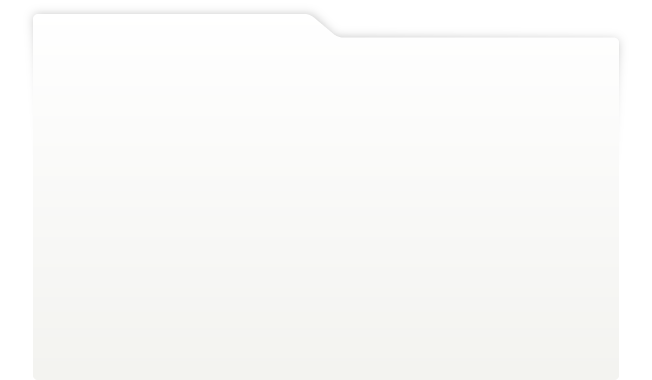
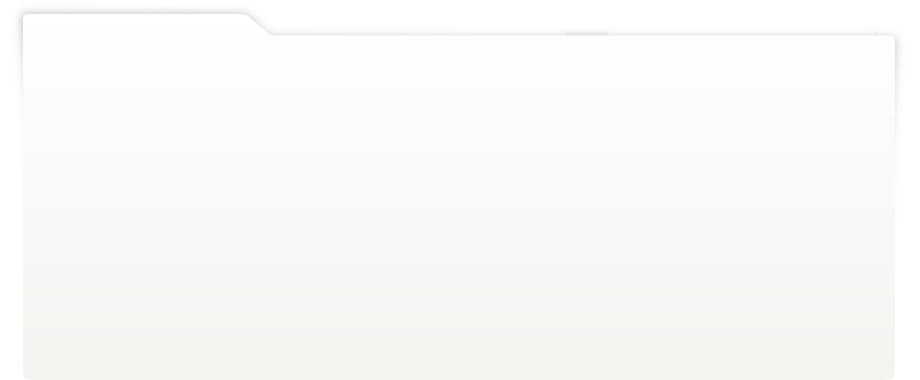
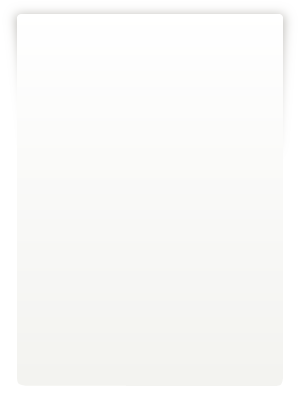
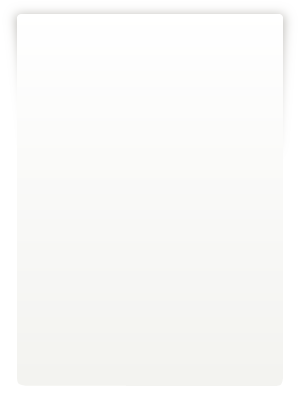
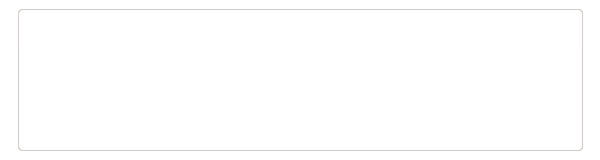
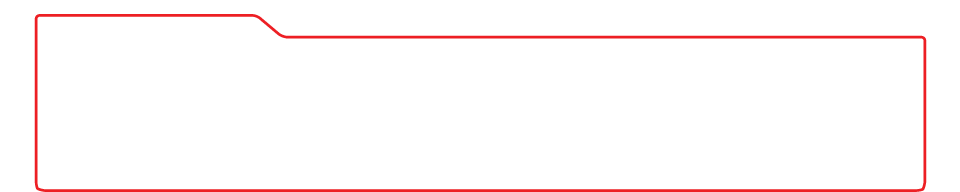
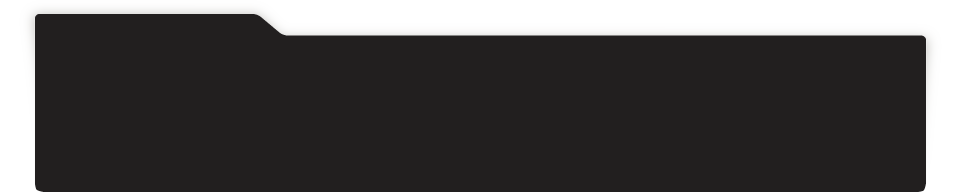
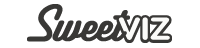
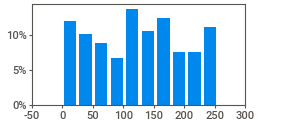
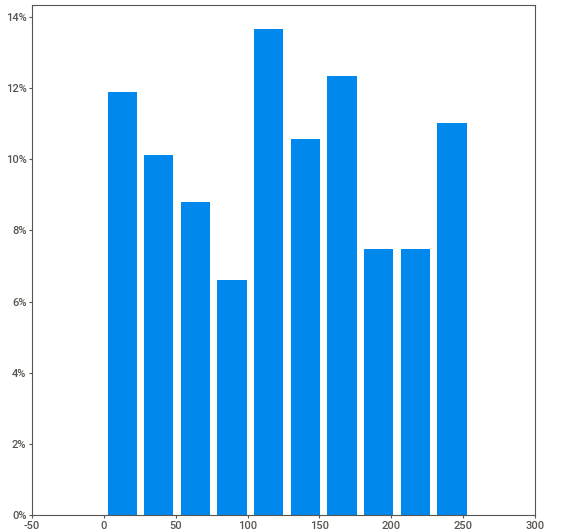
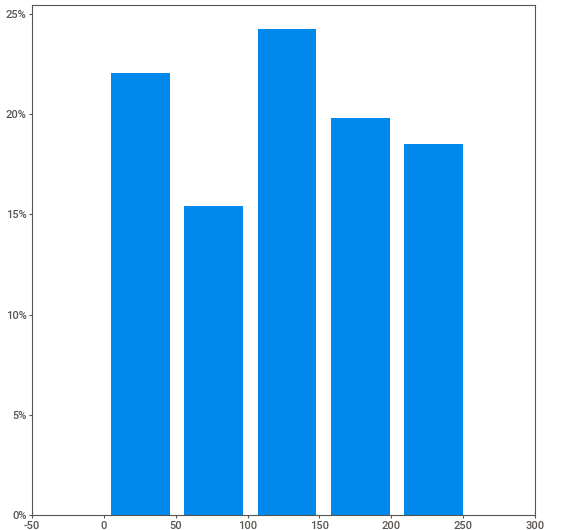
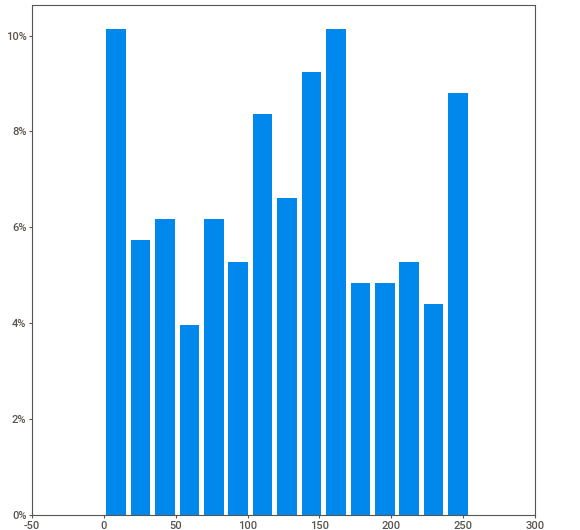
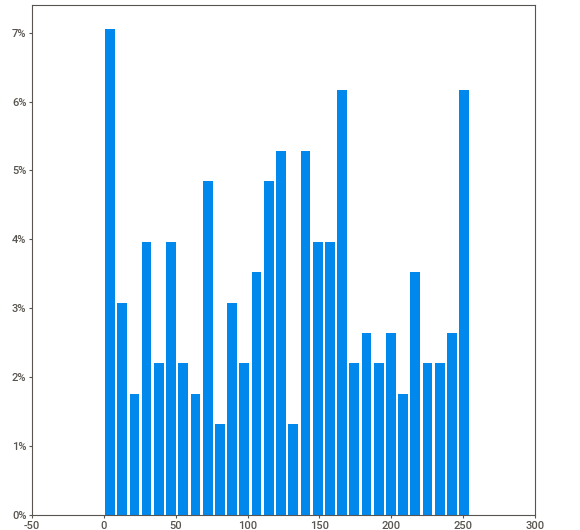
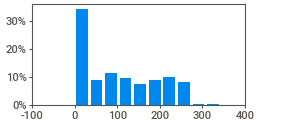
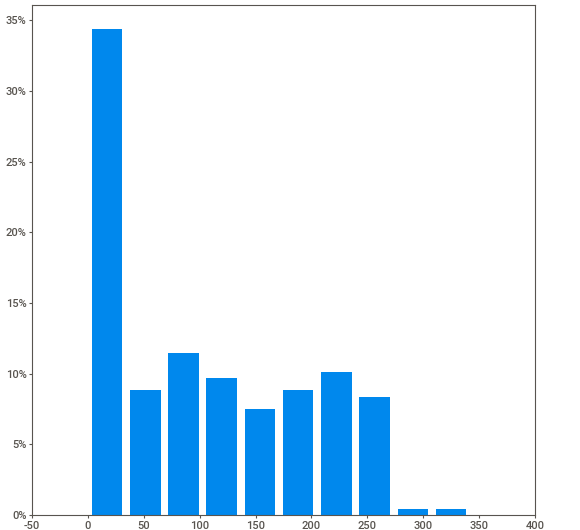
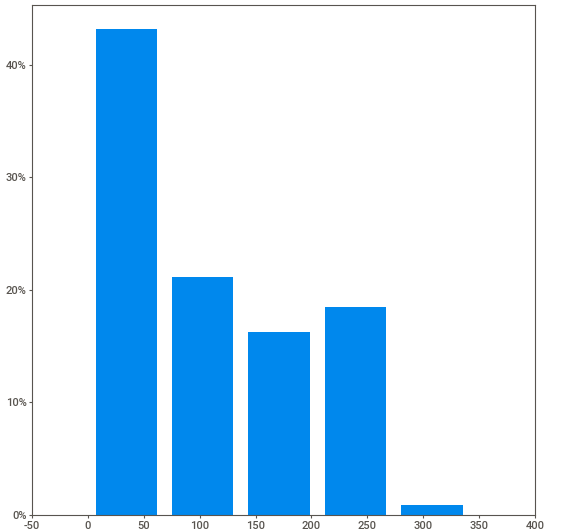
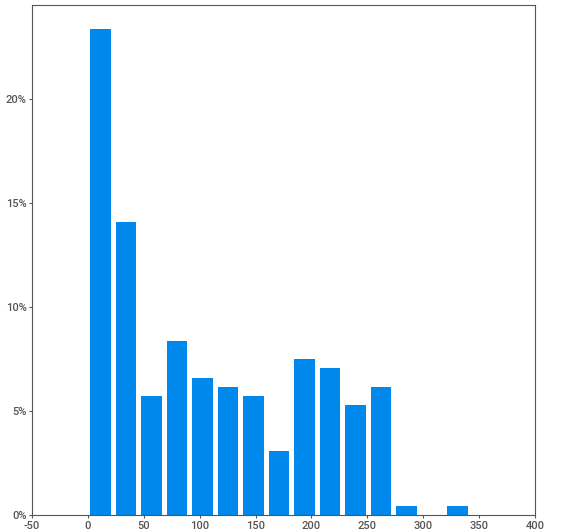
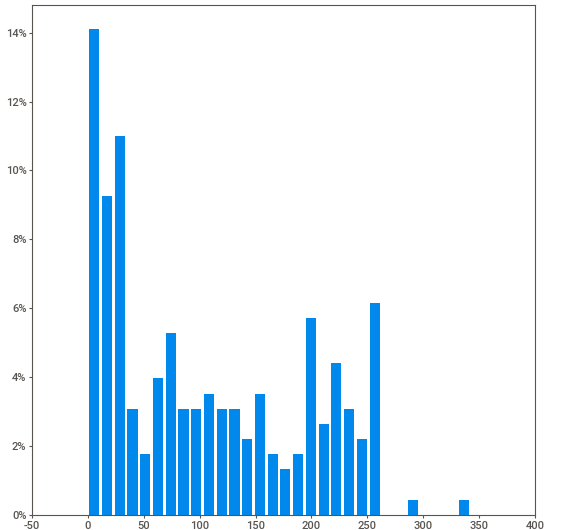
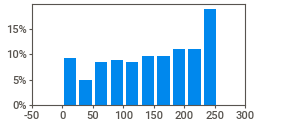
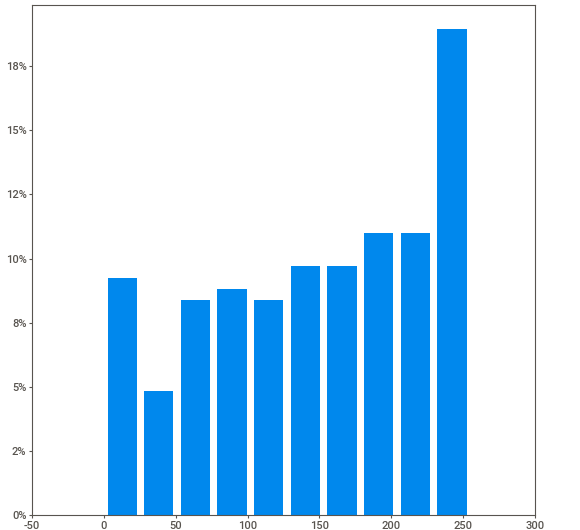
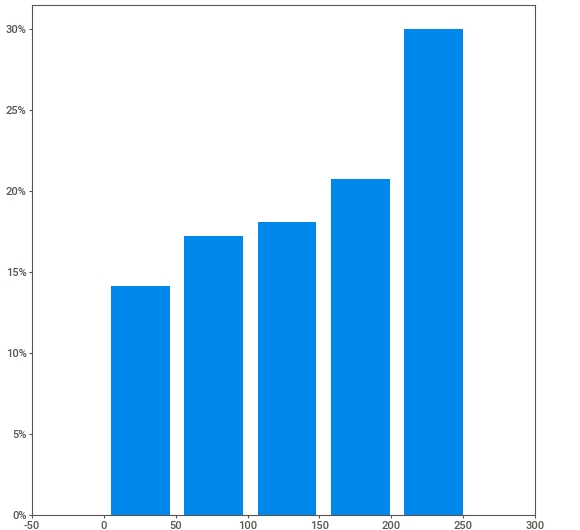
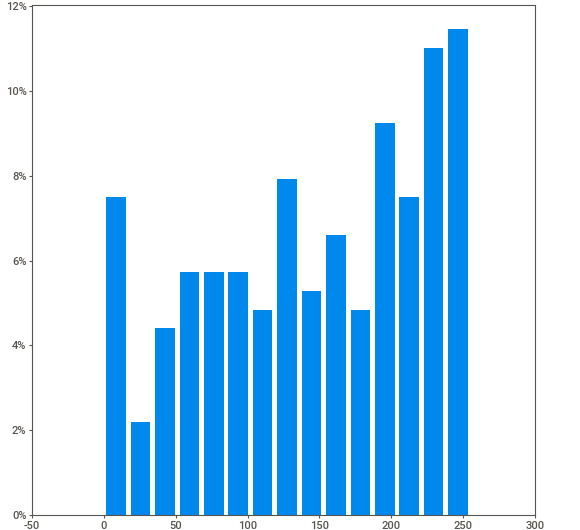
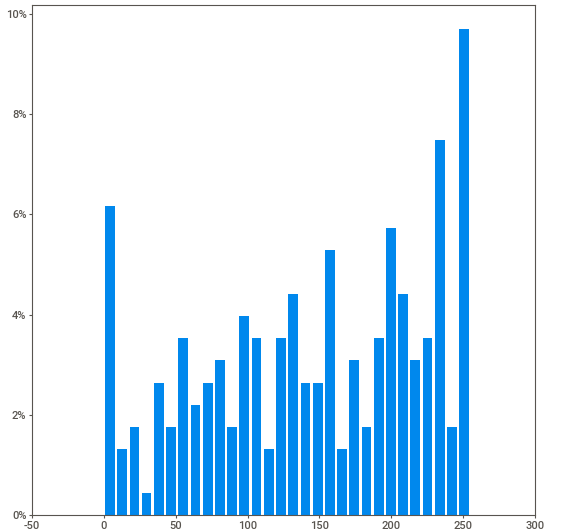
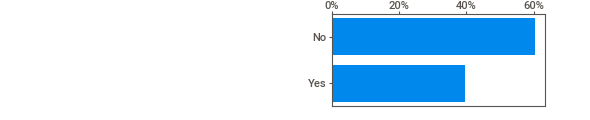
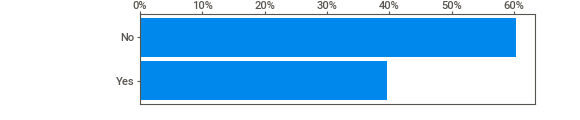
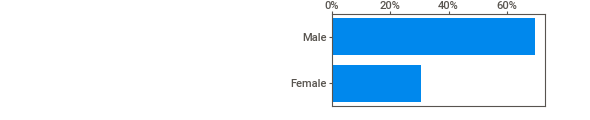
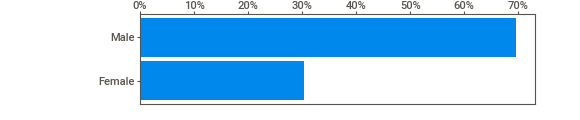
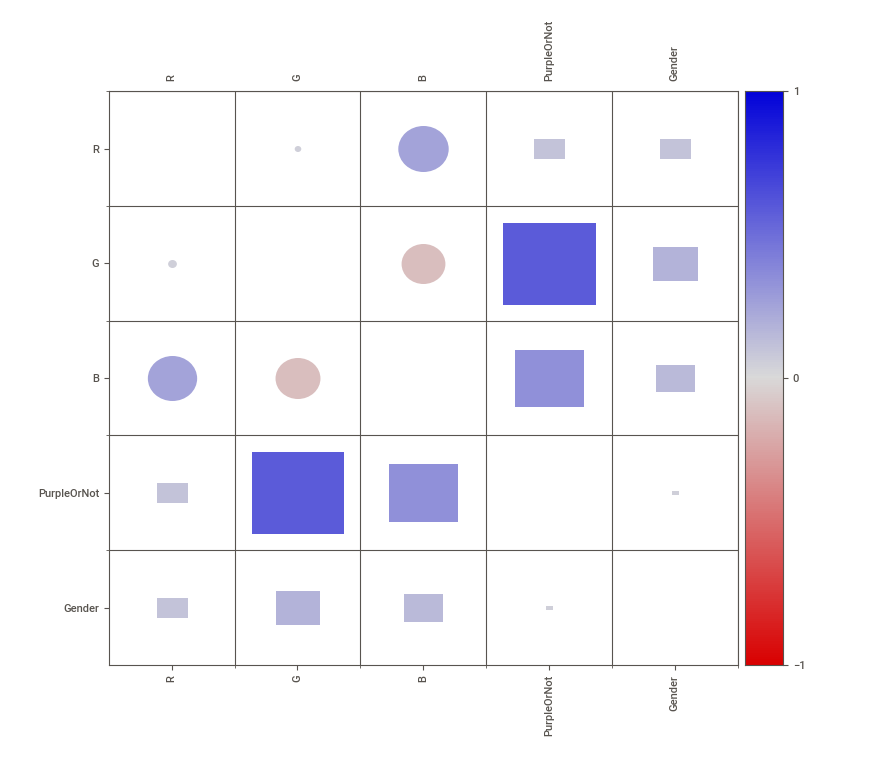
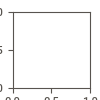

In [39]:
my_report.show_notebook()

In [40]:
my_report.show_html('FinalReport.html')

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [41]:
df.to_csv("sample.csv", index=None)

In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('sample.csv',chart_format='html' )

Output hidden; open in https://colab.research.google.com to view.

In [43]:
df.shape

(227, 5)

# How to synthetically oversample the data using gaussian parametric assumptions for a joint probability distribution defined by all the attributes in your dataset

In [44]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)

sample = model.sample(1000)
sample.to_csv('sampled_gaussian_jpd.csv')

In [45]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('sampled_gaussian_jpd.csv',chart_format='html' )

Shape of your Data Set loaded: (1000, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    6 Predictors classified...
        1 variables removed since they were ID or low-information variables
No scatter plots with depVar when no depVar is given.
Saving pair_scatters in HTML format
Saving distplots_nums in HTML format
Saving violinplots in HTML format
Saving heatmaps in HTML format
Saving cat_var_plots in HTML format
Time to run AutoViz (in seconds) = 6


# Model PurpleOrNot as a function of R, G, B and Gender :
Evaluate a set of models - not just logistic regression - for the classification ability of Purple, starting with a PORTION of the data for fitting only, but a different portion each time, many times in a row, to see if our model has truly learned something valuable

In [50]:
from google.colab import auth
auth.authenticate_user()

# crowd source data from https://www.google.com/search?q=rgb+color+picker&oq=rgb+color+pick&aqs=chrome.0.0i131i433i512j69i57j0i512l8.3860j0j7&sourceid=chrome&ie=UTF-8 
# Spreadsheet: https://docs.google.com/spreadsheets/d/1YxKU56T1j848K0kHcgQfqUuYxjE7G9F2_j87sswKmbE/edit#gid=0

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('GuessPurple').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
df.columns = df.iloc[0,:]
df = df.iloc[1:, :]
print(df.head())

import numpy as np
df[df==''] = np.nan
df = df.dropna()

df[df=="No "] = "No" 

df['R'] = df['R'].astype('float64')
df['G'] = df['G'].astype('float64')
df['B'] = df['B'].astype('float64')

df['PurpleOrNot'] = df['PurpleOrNot'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df.info()

0    R    G    B PurpleOrNot  Gender
1  255    0  255          No    Male
2  183   52  235         Yes    Male
3  165   14  235         Yes    Male
4   14  202  235          No    Male
5  213  204  219         Yes  Female
<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 1 to 227
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   R            227 non-null    float64 
 1   G            227 non-null    float64 
 2   B            227 non-null    float64 
 3   PurpleOrNot  227 non-null    category
 4   Gender       227 non-null    category
dtypes: category(2), float64(3)
memory usage: 7.8 KB


In [61]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# create the dataset
def get_dataset(): #n_samples=100):
    # X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    
    X=df[['R', 'G', 'B']]  # Features
    y=(df['PurpleOrNot'].astype('str')=='Yes').astype('int') #df['PurpleOrNot'] #.astype('category')  # Labels
    
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    models.append(PassiveAggressiveClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    models.append(GaussianProcessClassifier())
    models.append(GradientBoostingClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(QuadraticDiscriminantAnalysis())
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        print("skipping")
        continue
    # store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))



>LogisticRegression: ideal=0.819, cv=0.801
>RidgeClassifier: ideal=0.815, cv=0.801
>SGDClassifier: ideal=0.700, cv=0.700
>PassiveAggressiveClassifier: ideal=0.696, cv=0.747
>KNeighborsClassifier: ideal=0.899, cv=0.899
>DecisionTreeClassifier: ideal=0.846, cv=0.845
>ExtraTreeClassifier: ideal=0.824, cv=0.801
>LinearSVC: ideal=0.722, cv=0.635
>SVC: ideal=0.890, cv=0.903
>GaussianNB: ideal=0.846, cv=0.841
>AdaBoostClassifier: ideal=0.855, cv=0.850
>BaggingClassifier: ideal=0.868, cv=0.889
>RandomForestClassifier: ideal=0.899, cv=0.890
>ExtraTreesClassifier: ideal=0.912, cv=0.930
>GaussianProcessClassifier: ideal=0.916, cv=0.894
>GradientBoostingClassifier: ideal=0.868, cv=0.876
>LinearDiscriminantAnalysis: ideal=0.815, cv=0.801
>QuadraticDiscriminantAnalysis: ideal=0.903, cv=0.908


Correlation: 0.939


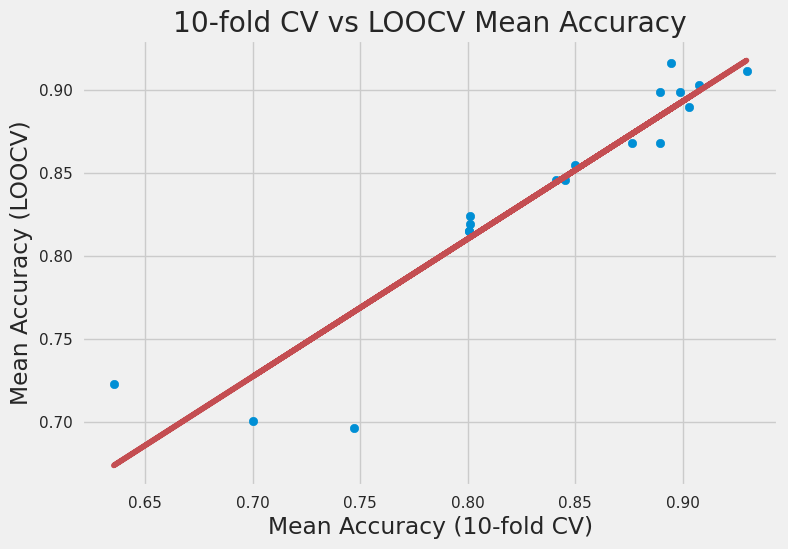

In [62]:
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

X=df[['R', 'G', 'B']]  # Features
y=(df['PurpleOrNot'].astype('str')=='Yes').astype('int') #df['PurpleOrNot'] #.astype('category')  # Labels
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report
y_pred_proba = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

# cr = classification_report(y, y_pred>0.15)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.88      0.97      0.92        29

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.93        69
weighted avg       0.93      0.93      0.93        69



In [73]:
model.fit(X,y)

import pickle
# save the model to disk
filename = 'myPurpleClassifier.pkl'
pickle.dump(model, open(filename, 'wb'))
 

In [74]:
# load the model from disk

filename = 'myPurpleClassifier.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

1.0
